In [24]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [25]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/RelaxSilica/"
print("data path: ", data_path)

level: level3 & tutorial name: reactive-silicon-dioxide
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level3/reactive-silicon-dioxide/RelaxSilica/


In [26]:
log = lammps_logfile.File(data_path + "log.lammps")
step = log.get("Step")
qSi = log.get("v_qSi")
qO = log.get("v_qO")
Volume = log.get("Volume")
timestep = 0.5
time = step*timestep
time /= 1000 # ps
Volume /= 1000 # nm3

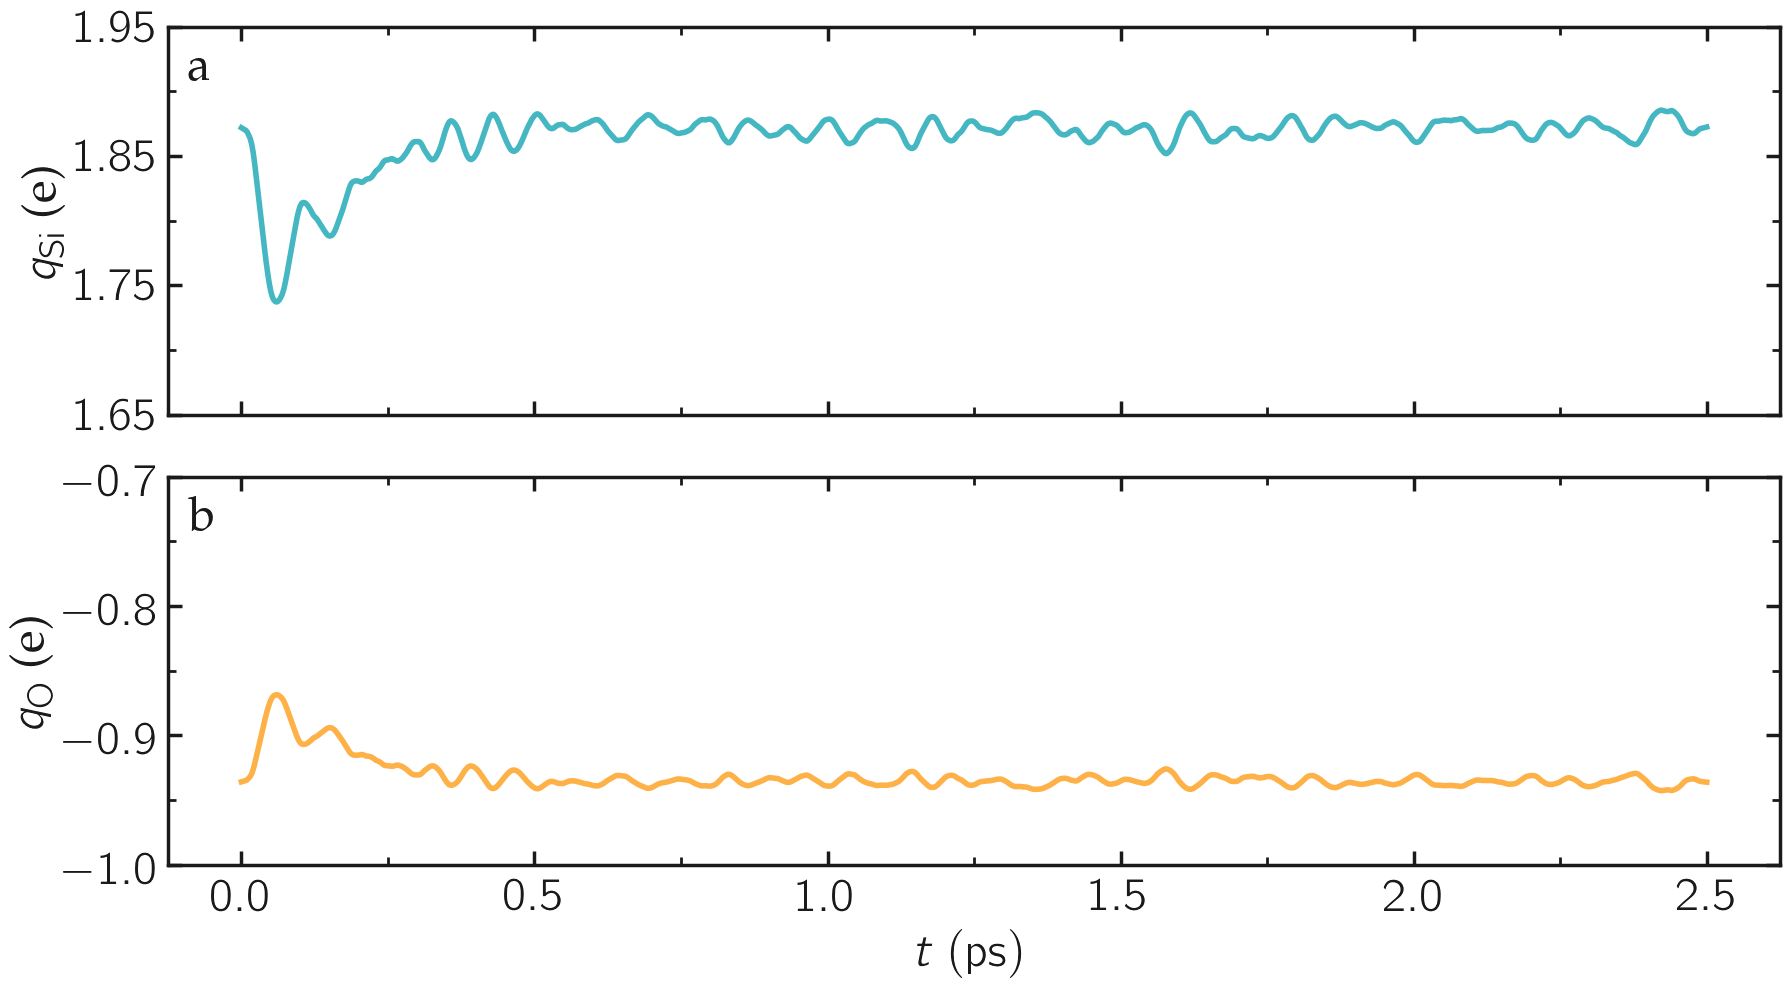

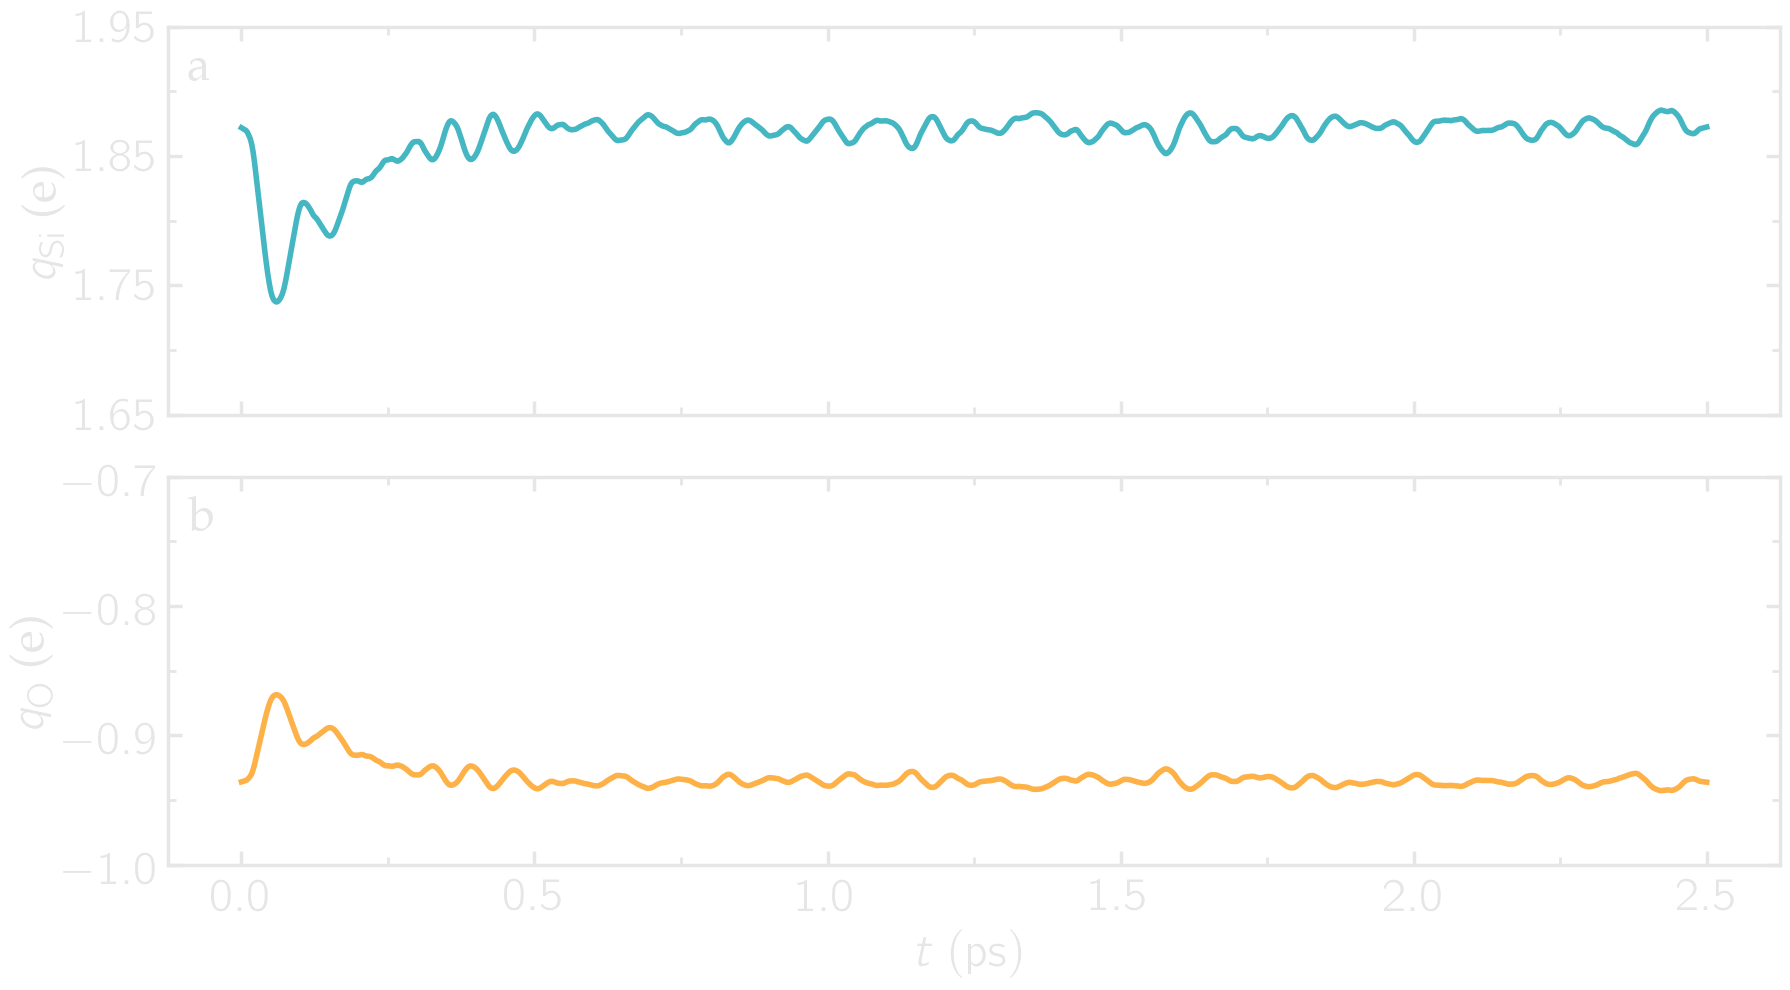

In [27]:
filename = "average-charge"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,10), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=2)
    myplt.add_panel()
    myplt.add_plot(x = time, y = qSi, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    myplt.complete_panel(ylabel = r'$q_\mathrm{Si}$ (e)', xlabel = None,
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(y_ticks=np.arange(1.65, 2, 0.1))
    myplt.add_panel()
    myplt.add_plot(x = time, y = qO, linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12)
    myplt.complete_panel(ylabel = r'$q_\mathrm{O}$ (e)', xlabel = r'$t ~ \mathrm{(ps)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(y_ticks=np.arange(-1, -0.7, 0.1))
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

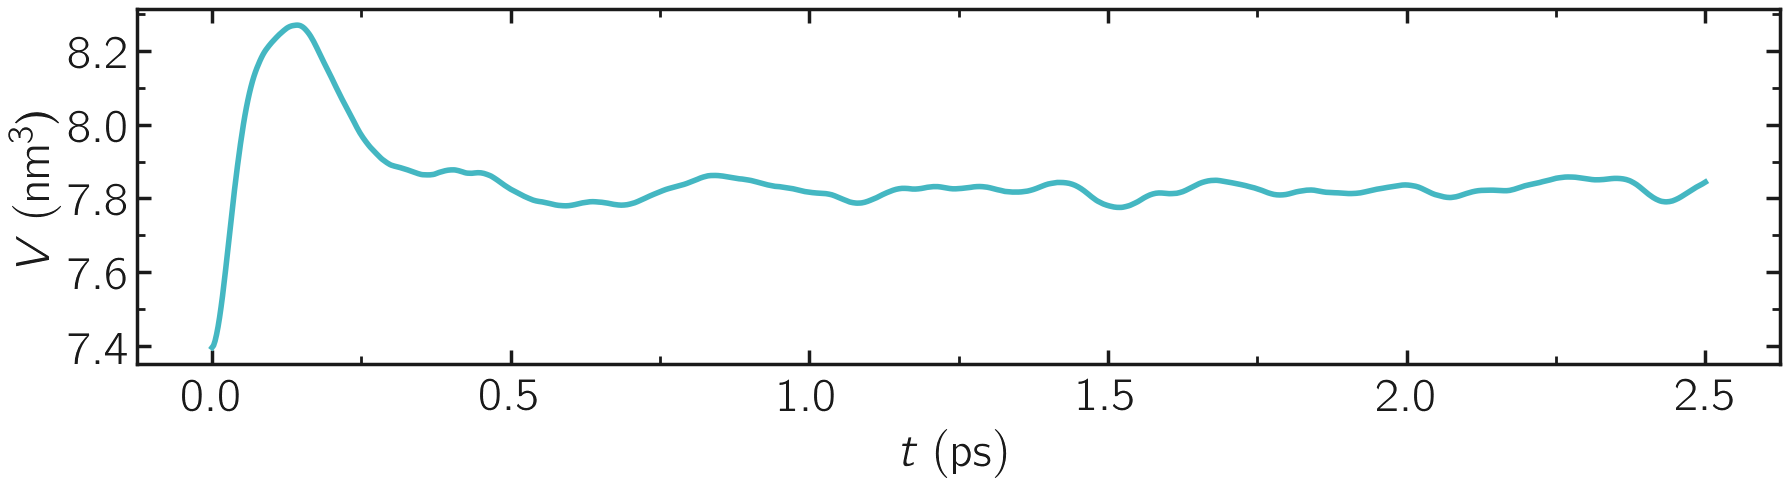

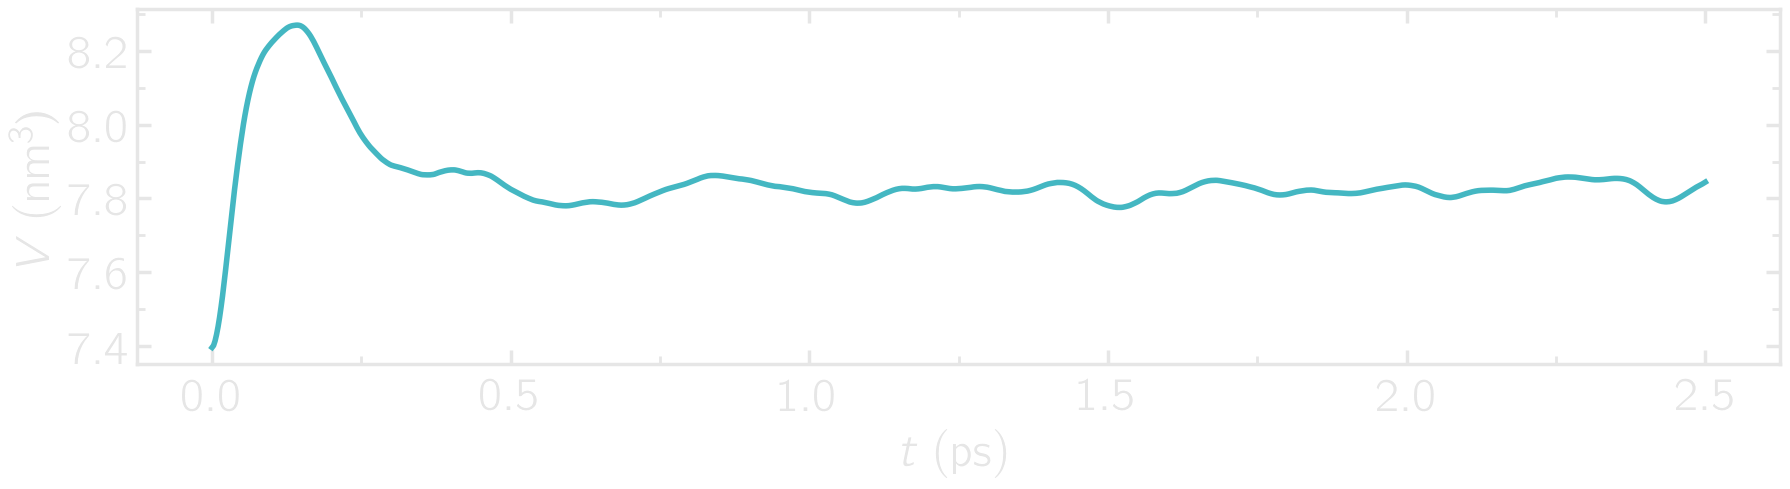

In [28]:
filename = "volume"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,5), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=1)
    myplt.add_panel()
    myplt.add_plot(x = time, y = Volume, linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12)
    myplt.complete_panel(ylabel = r'$V ~ (\mathrm{nm}^3$)', xlabel = r'$t ~ \mathrm{(ps)}$',
                         xpad = 10, legend=False, handlelength_legend=1)
    #myplt.set_boundaries(x_ticks=np.arange(0, 16, 2.5), y_ticks=np.arange(0, 1100, 200))
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

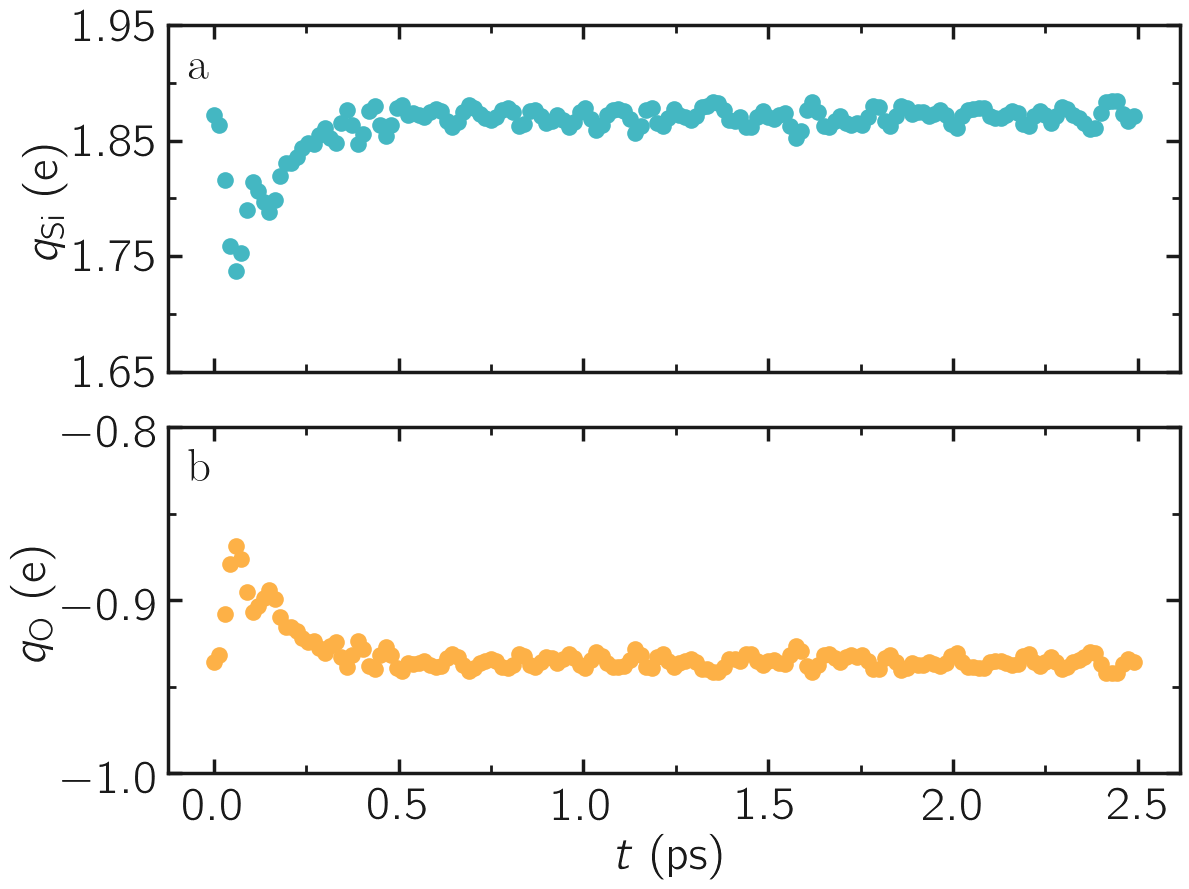

In [29]:
filename = "charge-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,9), dark_mode = False,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = time[::6], y = qSi[::6], linewidth_data = 3,
            marker = "o", data_color = 0, markersize = 12)
myplt.complete_panel(ylabel = r'$q_\mathrm{Si}$ (e)', xlabel = None,
                    xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(y_ticks=np.arange(1.65, 2, 0.1))
myplt.add_panel()
myplt.add_plot(x = time[::6], y = qO[::6], linewidth_data = 3,
            marker = "o", data_color = 1, markersize = 12)
myplt.complete_panel(ylabel = r'$q_\mathrm{O}$ (e)', xlabel = r'$t ~ \mathrm{(ps)}$',
                    xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(y_ticks=np.arange(-1, -0.75, 0.1))
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')

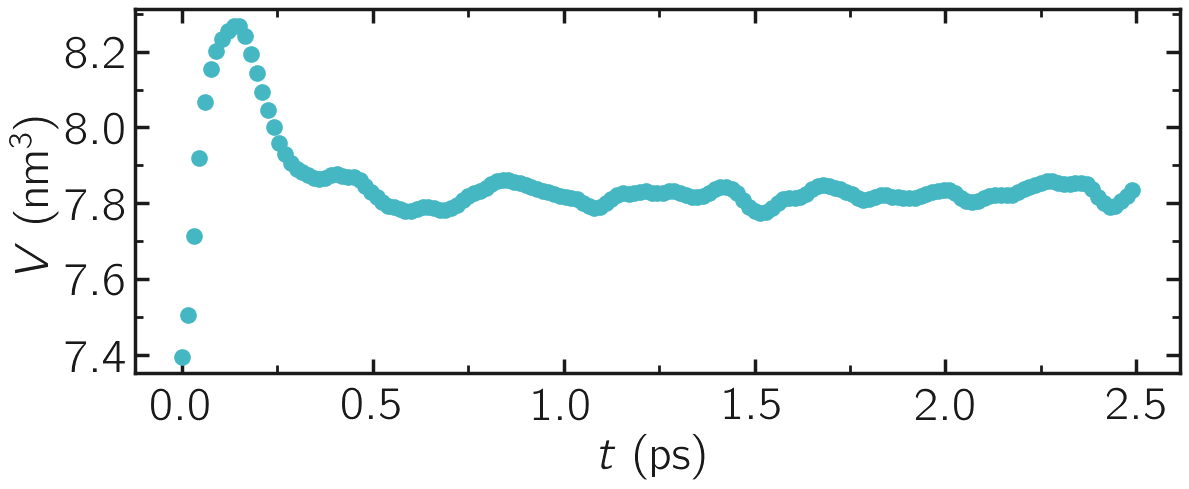

In [30]:
filename = "volume-article"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5), dark_mode = False,
                    transparency = False, use_serif=False, n_line=1)
myplt.add_panel()
myplt.add_plot(x = time[::6], y = Volume[::6], linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
myplt.complete_panel(ylabel = r'$V ~ (\mathrm{nm}^3$)', xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)
#myplt.set_boundaries(x_ticks=np.arange(0, 16, 2.5), y_ticks=np.arange(0, 1100, 200))
# myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')